In [1]:
import pandas as pd

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
listings = pd.read_csv("listings.csv")
listings.head(1)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,269467,https://www.airbnb.com/rooms/269467,20240615011618,2024-06-15,city scrape,Sunny and quiet Loft next to Sagrada Familia,The apartment is a cosy open space with 65 m2....,NaN,https://a0.muscache.com/pictures/a6445a90-94eb...,1411775,...,4.79,4.81,4.67,HUTB-001129,t,3,3,0,0,1.15


In [4]:
list(listings.columns)

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'source',
 'name',
 'description',
 'neighborhood_overview',
 'picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'latitude',
 'longitude',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bathrooms_text',
 'bedrooms',
 'beds',
 'amenities',
 'price',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'calendar_updated',
 'has_availability',
 'availability_30

columnas_a_eliminar = ['id', 'listing_url', 'scrape_id', 'last_scraped', 'source','neighborhood_overview','picture_url','host_id',
'host_url', 'host_name','host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate',
'host_thumbnail_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications',
'neighbourhood', 'neighbourhood_cleansed', 'minimum_minimum_nights','maximum_minimum_nights', 'minimum_maximum_nights',
'maximum_maximum_nights', 'minimum_nights_avg_ntm','maximum_nights_avg_ntm', 'calendar_updated', 'availability_90',
'availability_365', 'calendar_last_scraped',  'number_of_reviews','number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
'last_review', 'review_scores_accuracy', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes',
'calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms']

In [6]:
columnas_a_eliminar = [0,1,2,3,4,7,8,9,10,11,14,15,16,17,19,20,21,22,23,24,27,28,43,44,45,46,47,48,49,53,54,55,57,58,59,62,70,71,72,73]
listings_clean = listings.drop(listings.columns[columnas_a_eliminar], axis=1)

In [7]:
listings_clean.shape

(18925, 35)

In [8]:
list(listings_clean.columns)

['name',
 'description',
 'host_since',
 'host_location',
 'host_is_superhost',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood_group_cleansed',
 'latitude',
 'longitude',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bathrooms_text',
 'bedrooms',
 'beds',
 'amenities',
 'price',
 'minimum_nights',
 'maximum_nights',
 'has_availability',
 'availability_30',
 'availability_60',
 'number_of_reviews',
 'last_review',
 'review_scores_rating',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'license',
 'instant_bookable',
 'reviews_per_month']

In [9]:
listings_clean.isnull().sum()

name                               0
description                      683
host_since                         2
host_location                   4428
host_is_superhost                124
host_has_profile_pic               2
host_identity_verified             2
neighbourhood_group_cleansed       0
latitude                           0
longitude                          0
property_type                      0
room_type                          0
accommodates                       0
bathrooms                       3743
bathrooms_text                    23
bedrooms                        1882
beds                            3838
amenities                          0
price                           3736
minimum_nights                     0
maximum_nights                     0
has_availability                1050
availability_30                    0
availability_60                    0
number_of_reviews                  0
last_review                     4787
review_scores_rating            4787
r

In [10]:
listings_clean.shape

(18925, 35)

'has_availability','availability_30', 'availability_60', 'number_of_reviews',
'last_review', 'review_scores_rating', 'review_scores_cleanliness'

# Tratamiento Nulos

In [13]:
listings_clean["has_availability"].isnull().sum()

1050

In [14]:
listings_clean["has_availability"].nunique()

2

In [15]:
listings_clean["availability_30"].isnull().sum()

0

In [16]:
listings_clean["availability_60"].isnull().sum()

0

In [17]:
listings_clean["number_of_reviews"].isnull().sum()

0

In [18]:
listings_clean["last_review"].isnull().sum()

4787

In [19]:
listings_clean["review_scores_rating"].isnull().sum()

4787

In [20]:
listings_clean["review_scores_cleanliness"].isnull().sum()

4808

## Columna 'price' 

eliminar los valores nulos de la columna 'price'

In [22]:
listings_clean["price"].isnull().sum()

3736

In [23]:
listings_clean = listings_clean.dropna(subset=["price"])

In [24]:
listings_clean["price"].isnull().sum()

0

In [25]:
listings_clean.shape

(15189, 35)

## Columna "has_availability"

In [27]:
# Convertir con manejo de valores no reconocidos o nulos
listings_clean['has_availability'] = listings_clean['has_availability'].map({'t': True, 'no': False}).fillna(False) # Llena celdas vacias con False

In [28]:
listings_clean["has_availability"].isnull().sum()

0

## Columna 'last_review'

In [30]:
listings_clean["last_review"].isnull().sum()

3317

In [119]:
listings_clean["last_review"].describe()

count                            11872
mean     2024-01-24 21:12:36.873315328
min                2011-06-23 00:00:00
25%                2024-03-02 00:00:00
50%                2024-05-22 00:00:00
75%                2024-06-03 00:00:00
max                2024-06-14 00:00:00
Name: last_review, dtype: object

In [123]:
listings_clean["last_review"].nunique()

1023

In [113]:
listings_clean['last_review'] = pd.to_datetime(listings_clean['last_review'])

In [115]:
listings_clean["last_review"]

0       2024-05-22
1       2016-08-13
2       2024-05-02
4       2024-05-20
5       2024-06-05
           ...    
18920          NaT
18921          NaT
18922          NaT
18923          NaT
18924          NaT
Name: last_review, Length: 15189, dtype: datetime64[ns]

In [117]:
listings_clean["last_review"].isnull().sum()

3317

In [33]:
listings_clean.shape

(15189, 35)

## Columna 'review_scores_rating'

In [35]:
listings_clean["review_scores_rating"].describe()

count    11872.000000
mean         4.591732
std          0.480347
min          1.000000
25%          4.460000
50%          4.700000
75%          4.890000
max          5.000000
Name: review_scores_rating, dtype: float64

In [36]:
listings_clean["review_scores_rating"].isnull().sum()

3317

In [105]:
listings_clean['review_scores_rating'].fillna(listings_clean['review_scores_rating'].mean(), inplace=True)

In [107]:
listings_clean["review_scores_rating"].isnull().sum()

0

In [37]:
listings_clean["review_scores_rating"]

0        4.74
1        4.00
2        4.35
4        4.79
5        4.46
         ... 
18920     NaN
18921     NaN
18922     NaN
18923     NaN
18924     NaN
Name: review_scores_rating, Length: 15189, dtype: float64

## Columna 'review_scores_cleanliness'

In [39]:
listings_clean["review_scores_cleanliness"].describe()

count    11854.000000
mean         4.618333
std          0.461061
min          1.000000
25%          4.500000
50%          4.740000
75%          4.910000
max          5.000000
Name: review_scores_cleanliness, dtype: float64

In [40]:
listings_clean["review_scores_cleanliness"].isnull().sum()

3335

In [41]:
listings_clean['review_scores_cleanliness'].fillna(listings_clean['review_scores_cleanliness'].mean(), inplace=True)

In [42]:
listings_clean["review_scores_cleanliness"].isnull().sum()

0

In [109]:
listings_clean.isnull().sum()

name                               0
description                      487
host_since                         0
host_location                   3232
host_is_superhost                119
host_has_profile_pic               0
host_identity_verified             0
neighbourhood_group_cleansed       0
latitude                           0
longitude                          0
property_type                      0
room_type                          0
accommodates                       0
bathrooms                          7
bathrooms_text                    22
bedrooms                          10
beds                             102
amenities                          0
price                              0
minimum_nights                     0
maximum_nights                     0
has_availability                   0
availability_30                    0
availability_60                    0
number_of_reviews                  0
last_review                     3317
review_scores_rating               0
r

# Analisis Exploratorio (EDA)

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

## histplot has_availability

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_stats/counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_stats/counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)


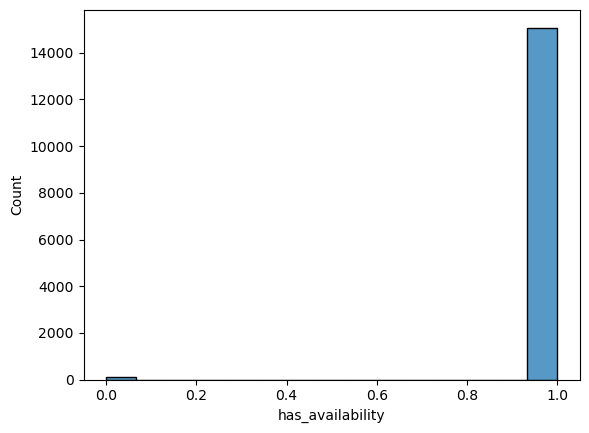

In [46]:
sns.histplot(data = listings_clean, x='has_availability')
plt.show()

## histplot availability_30

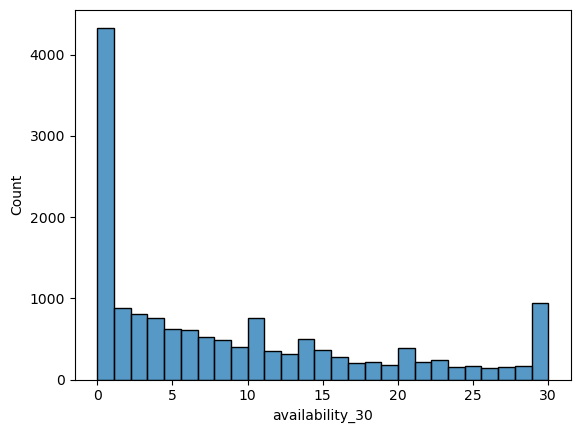

In [48]:
sns.histplot(data = listings_clean, x='availability_30')
plt.show()

## histplot availability_60

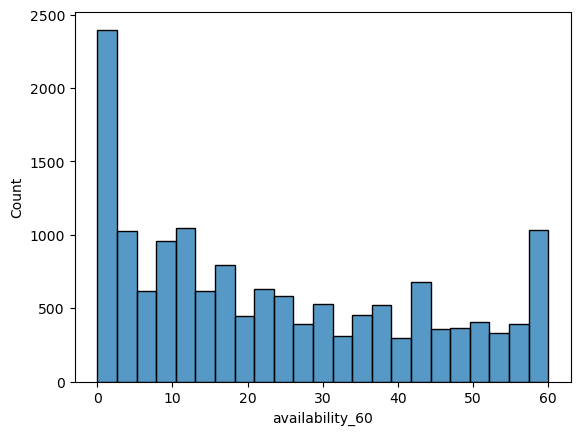

In [50]:
sns.histplot(data = listings_clean, x='availability_60')
plt.show()

## histplot number_of_reviews

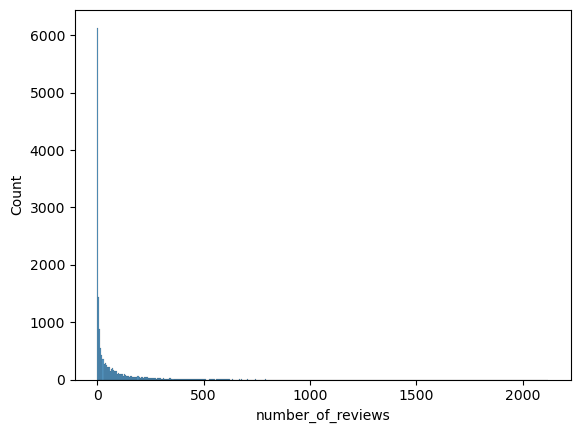

In [52]:
sns.histplot(data = listings_clean, x='number_of_reviews')
plt.show()

## histplot number_of_reviews

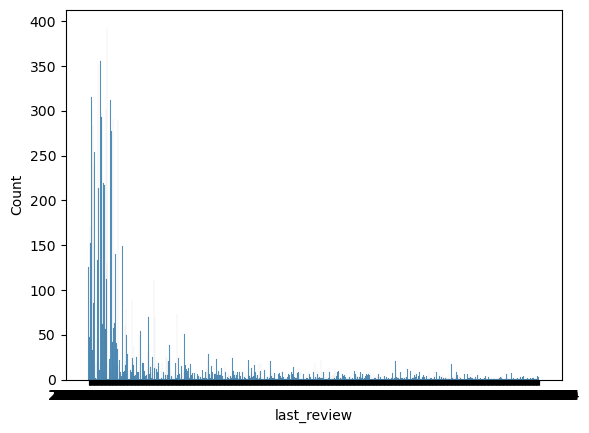

In [54]:
sns.histplot(data = listings_clean, x='last_review')
plt.show()

## histplot review_scores_rating

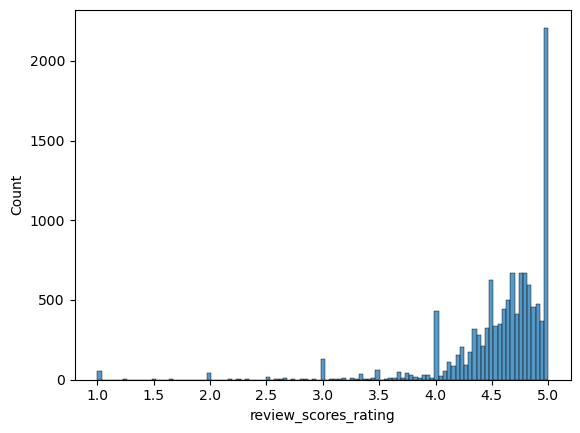

In [56]:
sns.histplot(data = listings_clean, x='review_scores_rating')
plt.show()

## histplot review_scores_cleanliness

In [58]:
listings_clean.review_scores_cleanliness.mean()

4.618333052134301

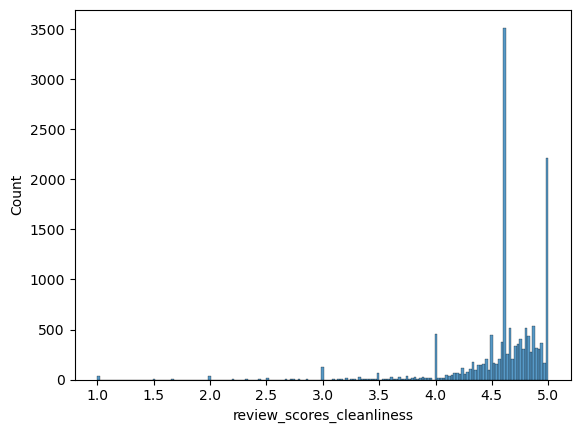

In [59]:
sns.histplot(data = listings_clean, x='review_scores_cleanliness')
plt.show()

In [60]:
listings_clean.isnull().sum()

name                               0
description                      487
host_since                         0
host_location                   3232
host_is_superhost                119
host_has_profile_pic               0
host_identity_verified             0
neighbourhood_group_cleansed       0
latitude                           0
longitude                          0
property_type                      0
room_type                          0
accommodates                       0
bathrooms                          7
bathrooms_text                    22
bedrooms                          10
beds                             102
amenities                          0
price                              0
minimum_nights                     0
maximum_nights                     0
has_availability                   0
availability_30                    0
availability_60                    0
number_of_reviews                  0
last_review                     3317
review_scores_rating            3317
r

In [176]:
listings_clean["last_review"]

0       2024-05-22
1       2016-08-13
2       2024-05-02
4       2024-05-20
5       2024-06-05
           ...    
18920          NaT
18921          NaT
18922          NaT
18923          NaT
18924          NaT
Name: last_review, Length: 15189, dtype: datetime64[ns]

In [183]:
import pandas as pd
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords
# Descargar lista de stopwords
nltk.download('stopwords')
# Cargar stopwords en inglés
stop_words = set(stopwords.words('english'))
# Suponiendo que tienes un DataFrame llamado df con las columnas 'name', 'description' y 'amenities'
# Concatenar todos los textos de las columnas 'name', 'description' y 'amenities' en un solo string
textos_combinados = listings_clean[['name', 'description', 'amenities']].fillna('').apply(lambda x: ' '.join(x), axis=1).str.cat(sep=' ')
# Convertir a minúsculas
textos_combinados = textos_combinados.lower()
# Eliminar puntuación y caracteres especiales usando una expresión regular
textos_combinados = re.sub(r'[^\w\s]', '', textos_combinados)
# Dividir el texto en palabras individuales
palabras = textos_combinados.split()
# Eliminar stopwords
palabras_filtradas = [palabra for palabra in palabras if palabra not in stop_words]
# Contar la frecuencia de cada palabra
contador_palabras_filtradas = Counter(palabras_filtradas)
# Mostrar las 10 palabras más comunes
palabras_comunes_filtradas = contador_palabras_filtradas.most_common(10)
print(palabras_comunes_filtradas)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/migueldacostam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('hot', 18355), ('water', 18324), ('kitchen', 17740), ('wifi', 17704), ('dryer', 15833), ('apartment', 15286), ('allowed', 14483), ('bed', 14009), ('coffee', 13539), ('washer', 12908)]


In [189]:
import re

def limpiar_texto(texto):
    if pd.isna(texto):
        return ''
    texto = texto.lower()  # Convertir a minúsculas
    texto = re.sub(r'[^a-z\s]', '', texto)  # Eliminar símbolos no alfanuméricos
    return texto

# Aplicar la función a cada columna
listings_clean['name'] = listings_clean['name'].apply(limpiar_texto)
listings_clean['description'] = listings_clean['description'].apply(limpiar_texto)
listings_clean['amenities'] = listings_clean['amenities'].apply(limpiar_texto)

# Concatenar las columnas con un espacio
listings_clean['texto_completo'] = listings_clean['name'] + ' ' + listings_clean['description'] + ' ' + listings_clean['amenities']

In [197]:
listings_clean['texto_completo'].unique()

array(['sunny and quiet loft next to sagrada familia the apartment is a cosy open space with  m the living room and a bedroom areas look onto the quite balcony facing to south a lot of sun the loft has also a dinning area with a big table and a good desk area with books about barcelona there is a high quality internet service and a single folding bed the bedroom area has a double bed and wardrobe the living area has a sofa tv and hifi there is a separate kitchen kitchen patio or balcony host greets you hair dryer coffee maker essentials cooking basics washer refrigerator hangers dishwasher iron dishes and silverware wifi heating stove central air conditioning dedicated workspace hot water oven microwave tv',
       'monthly stays  bedroom apartment near rambla rented only for monthly periods  bedroom apartment located in the heart of barcelona next to la rambla and liceu thater one of the most active areas in barcelona a great place to live and enjoy the city please consider it is a se

In [201]:
palabras_clave = [
    'wifi', 'Wireless Internet', 'Wireless Connection', 'Internet Access',
    'Air Conditioning', 'AC (Air Conditioning)', 'Climate Control',
    'Kitchen', 'Cooking Area', 'Culinary Space',
    'Balcony', 'Terrace', 'Veranda',
    'Public Transport', 'Public Transit', 'Mass Transit',
    'Pet-Friendly', 'Pets Allowed', 'Pet Accommodation']

# Función para verificar si alguna de las palabras clave está en el texto
def contiene_palabra_clave(texto_completo):
    if pd.isna(texto_completo):
        return False
    texto_completo = texto_completo.lower()  # Convertir a minúsculas para una búsqueda insensible a mayúsculas
    return any(palabra.lower() in texto_completo for palabra in palabras_clave)

# Crear la nueva columna booleana 'contiene_palabra_clave'
listings_clean['contiene_palabra_clave'] = listings_clean['texto_completo'].apply(contiene_palabra_clave)

In [227]:
# Contar cuántos valores True y False hay en la columna 'contiene_palabra_clave'
conteo = listings_clean['contiene_palabra_clave'].value_counts()

print(conteo)

contiene_palabra_clave
True     15150
False       39
Name: count, dtype: int64
